## Predicting Sale Price of Houses - Data Analysis

We will use the house price dataset available on [Kaggle.com](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data). See below for more details.

### Steps to download the dataset

**As mentioned this data is from Kaggle**

- Visit the [Kaggle Website](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data).

- Scroll down to the bottom of the page, and click on the link **'train.csv'**, and then click the 'download' blue button towards the right of the screen, to download the dataset.

- The download the file called **'test.csv'** and save it in the directory with the notebooks.
- I have already download the zip file and saved in my local.

In [2]:
# import necessary libraries

# to handle datasets
import numpy as np
import pandas as pd

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# for data transformation (for yeo-johnson transformation)
import scipy.stats as stats

# to display all the columns of the dataframe in the notebook
pd.pandas.set_option('display.max_columns', None)

In [4]:
# import datasets and check its shape and head

df = pd.read_csv('Datasets/train.csv')

print(df.shape)

df.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
# check the data info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
# first lets drop the Id column which is a unique identifier for each data point
df.drop('Id', axis = 1, inplace = True)

The house price dataset contains 1460 rows, that is, houses, and 80 columns, i.e., variables. 

79 are predictive variables and 1 is the target variable: SalePrice

## Analysis

**We will analyse the following:**

1. The target variable
2. Variable types (categorical and numerical)
3. Missing data
4. Numerical variables
    - Discrete
    - Continuous
    - Distributions
    - Transformations

5. Categorical variables
    - Cardinality
    - Rare Labels
    - Special mappings
    
6. Additional Referential Resources

## Target

Let's begin by exploring the target distribution.

In [11]:
sns.set_style('darkgrid')

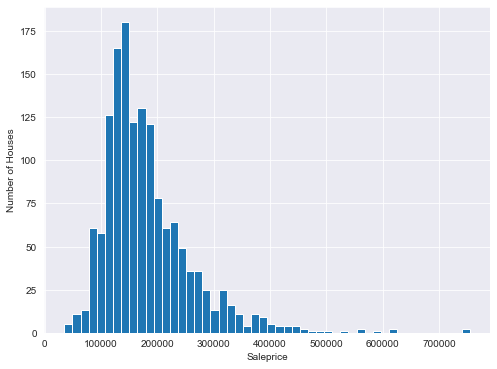

In [13]:
# histogram to evaluate target distribution

plt.figure(figsize= (8,6))
plt.hist(x = df['SalePrice'], bins = 50)
plt.ylabel('Number of Houses')
plt.xlabel('Saleprice')
plt.show();

- We can see that the target variable is continuous and the distribution is skewed towards the right
- We can improve the value spread with a mathematical transformation, we can use logarithmic transformation

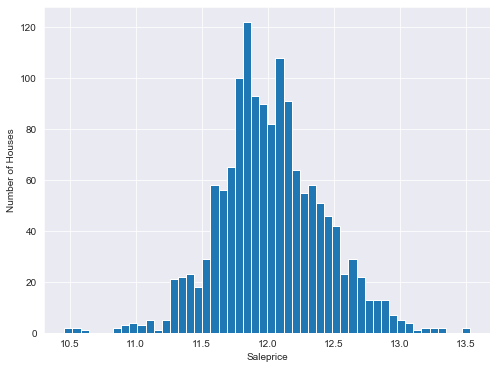

In [14]:
# transforming the target using Logarithmic Transformation
plt.figure(figsize= (8,6))
np.log(df['SalePrice']).hist(bins = 50)
plt.ylabel('Number of Houses')
plt.xlabel('Saleprice')
plt.show();

Now the distribution looks more Gaussian

## Variable Types

- Lets identify the categorical and numerical variables

In [17]:
df['MSSubClass'].unique()

array([ 60,  20,  70,  50, 190,  45,  90, 120,  30,  85,  80, 160,  75,
       180,  40], dtype=int64)

In [19]:
# creating a list of all categorical variables
cat_vars = [var for var in df.columns if df[var].dtype == 'O']

In [21]:
# we also see 'MSSubClass' even though the values are numeric, it is being used as a categorical feature
# lets add this as part of our cat_vars and convert it into categorical type

cat_vars = cat_vars + ['MSSubClass']

In [22]:
# convert into Categorical
df[cat_vars] = df[cat_vars].astype('O')

In [23]:
# number of categorical variables
print(len(cat_vars))

44


In [24]:
# similaryly identify the numerical variabls
num_vars = [var for var in df.columns if df[var].dtype != 'O' and var != 'SalePrice']

# number of numerical variables
print(len(num_vars))

35


# Missing values

Lets find out which variables of the dataset contain missing values.

In [28]:
# creating a list of all features that has null values
vars_with_na = [var for var in df.columns if df[var].isnull().sum() > 0]

print(vars_with_na)

['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


In [45]:
# percentage of missing values
#df[vars_with_na].isnull().sum()/len(df)
# can do this way as well
df[vars_with_na].isnull().mean().sort_values(ascending = False)

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
BsmtExposure    0.026027
BsmtFinType2    0.026027
BsmtFinType1    0.025342
BsmtCond        0.025342
BsmtQual        0.025342
MasVnrArea      0.005479
MasVnrType      0.005479
Electrical      0.000685
dtype: float64

- Our dataset contains a big proportion of missing values (top 4 variables above). And also some variables with small percentage of missing values
- We will need to impute these missing values with some appropriate values
- Lets visualize the percentage of these missig values

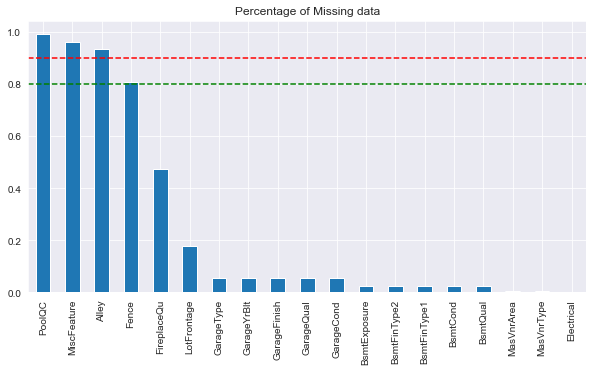

In [52]:
plt.figure(figsize= (10,5))
df[vars_with_na].isnull().mean().sort_values(ascending = False).plot(kind = 'bar')
plt.axhline(y = 0.9, color = 'r', linestyle='--')
plt.axhline(y = 0.8, color = 'g', linestyle='--')
plt.title('Percentage of Missing data')
plt.show();

In [55]:
# lets find which variables from those in missing data are categorical or numerical

cat_na = [var for var in cat_vars if var in vars_with_na]
num_na = [var for var in num_vars if var in vars_with_na]

print('Length of cat_na: {}'.format(len(cat_na)))
print('Length of num_na: {}'.format(len(num_na)))

Length of cat_na: 16
Length of num_na: 3


In [56]:
num_na

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [57]:
cat_na

['Alley',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [58]:
#test = df.copy()
#test['check'] = np.where(df['Alley'].isnull(), 1, 0)

In [68]:
#test.groupby('check')['SalePrice'].agg(['mean', 'std'])

,mean,std
check,,
0,142845.912088,42867.137343
1,183452.131483,80667.145180


<AxesSubplot:ylabel='check'>

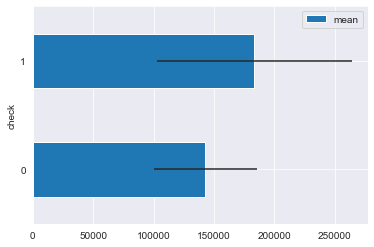

In [67]:
#test.groupby('check')['SalePrice'].agg(['mean', 'std']).plot(kind = 'barh', y = 'mean', xerr='std')

In [71]:
# lets write a function to find the impact of the missing values for each variable with missing data 
# into our target variable

def analyse_na_value(df, var):
    
    # lets create a copy of the df passed
    data = df.copy()
    
    # lets create a temporary column that stores the missing indicator
    # 1 if missing, else 0
    data[var] = np.where(data[var].isnull(), 1, 0)
    
    # create a temporary data grouped by this missing indicator against the target variable
    temp = data.groupby(var)['SalePrice'].agg(['mean', 'std'])
    
    # plotting a bar graph to show this missing data and SalePrice distribution
    temp.plot(kind='barh', y = 'mean', xerr = 'std', title = 'Sale Price', color = 'green', legend = False)
    
    plt.show();

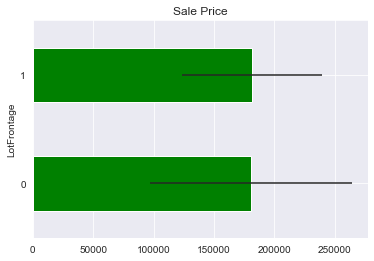

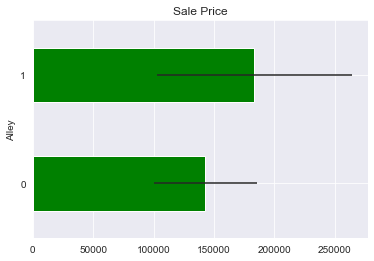

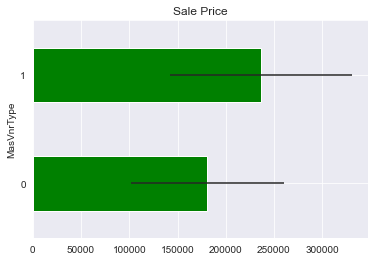

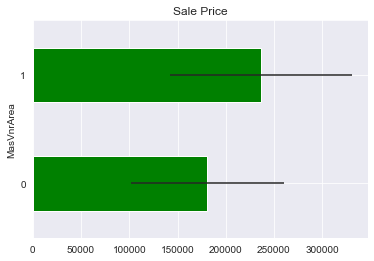

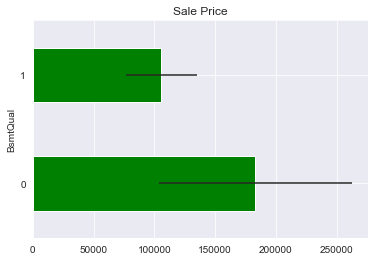

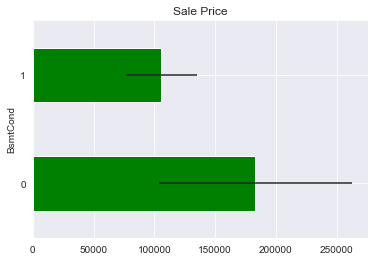

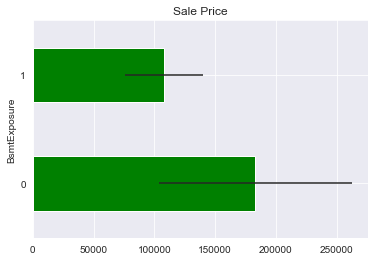

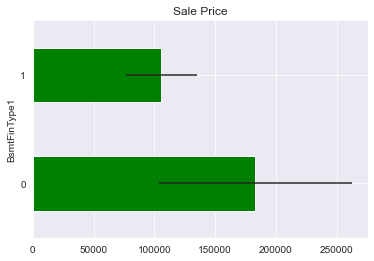

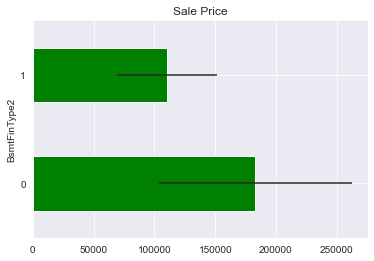

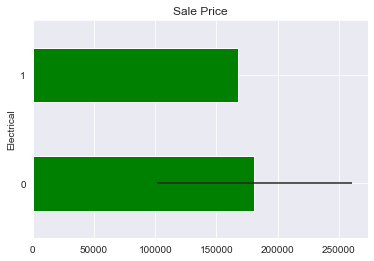

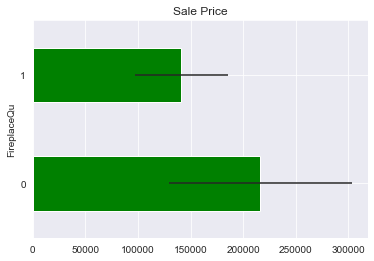

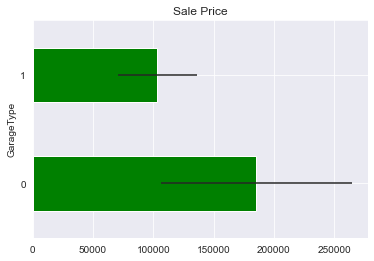

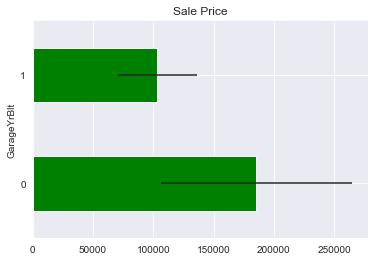

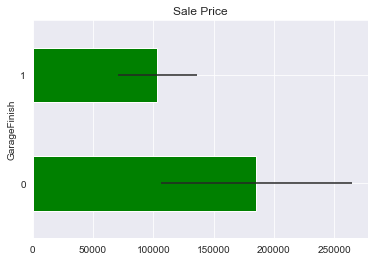

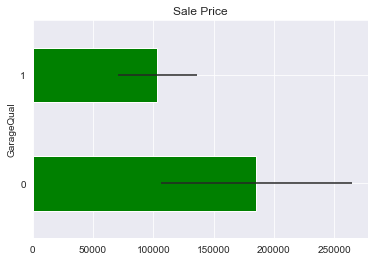

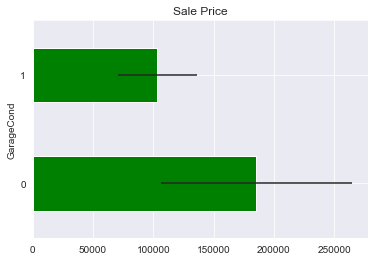

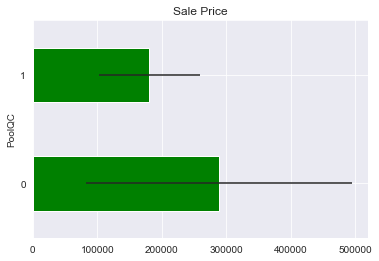

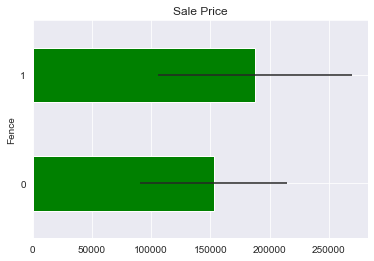

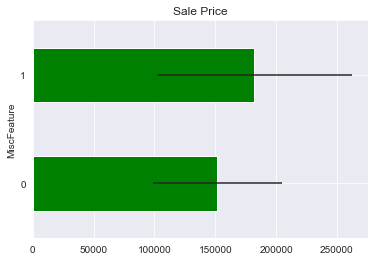

In [72]:
# lets run this for all the missing variables

for var in vars_with_na:
    analyse_na_value(df, var)

In some variables, the average SalePrice in houses where the information is missing differs from the one that has information. This indicates that the data being missed could be a good predictor of the SalePrice.

# Numerical variables

Let's analyze the numerical variables we have in the dataset

In [73]:
# no of numerical variables
print("Number of numerical variables: {}".format(len(num_vars)))

Number of numerical variables: 35


In [74]:
# checking the data
df[num_vars].head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008
1,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007
2,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008
3,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006
4,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008


## Temporal variables

We have 4 year variables in the dataset:

- YearBuilt: year in which the house was built
- YearRemodAdd: year in which the house was remodeled
- GarageYrBlt: year in which a garage was built
- YrSold: year in which the house was sold

We generally don't use date variables in their raw format. Instead, we extract information from them. For example, we can capture the difference in years between the year the house was built and the year the house was sold.

In [77]:
# variales in date format

year_vars = [var for var in num_vars if 'Year' in var or 'Yr' in var]

In [78]:
year_vars

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [80]:
# lets print out and explore the values of these variabls

for var in year_vars:
    print(var, df[var].unique())
    print()

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]

YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]

GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 200

- As expected, the values are all years
- Now, lets explore the evolution of the sale price with the years in which the house was sold

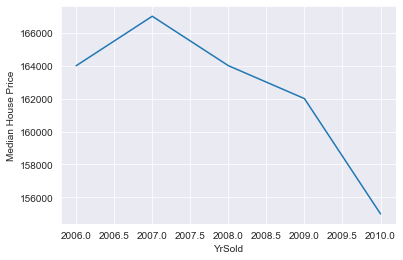

In [86]:
# plotting the median sale price vs the year in which it was sold

df.groupby('YrSold')['SalePrice'].median().plot()
plt.ylabel('Median House Price')
plt.show();

- There has been a drop in the House Price, which is unusual as house prices typically goes up
- Lets explore a little bit further
- Lets check the House Price against the built year

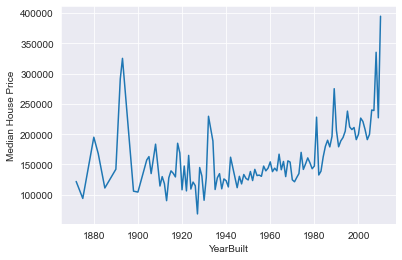

In [88]:
# plotting the median sale price vs the year in which it was built

df.groupby('YearBuilt')['SalePrice'].median().plot()
plt.ylabel('Median House Price')
plt.show();

We can see that newly built / younger houses tend to be more expensive.

Could it be that lately older houses were sold? Let's have a look at that.

For this, we will capture the elapsed years between the Year variables and the year in which the house was sold:

In [97]:
def analyze_year_vars(df, var):
    
    # make of the copy of the data passed
    df = df.copy()
    
    # create an interim feature that contains the difference between the year variable passed
    # and the year in which it was sold
    df[var] = df['YrSold'] - df[var]
    
    df.groupby('YrSold')[var].median().plot()
    plt.ylabel('Time from' + var)
    plt.show();

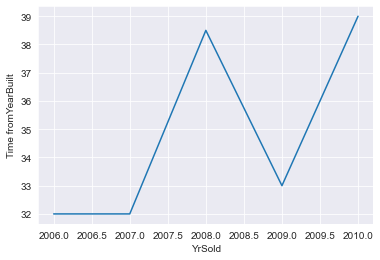

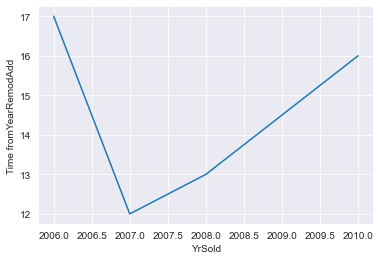

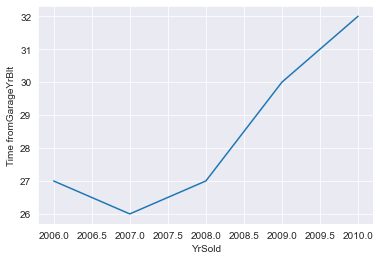

In [98]:
for var in year_vars:
    if var!= 'YrSold':
        analyze_year_vars(df[year_vars], var)

From the plots, we see that towards 2010, the houses sold had older garages, and had not been remodelled recently, that might explain why we see cheaper sales prices in recent years, at least in this dataset.

We can now plot instead the time since last remodelled, or time since built, and sale price, to see if there is a relationship.

In [114]:
def analyze_year_vars_2(data, var):
    
    # creating a copy of the df passed
    df = data.copy()
    
    # create an interim feature var that contains the difference between the year var passed and
    # the year in which the house was sold
    df[var] = df['YrSold'] - df[var]
    
    # creating a scatter plot to find relationship between the sale price and the year var passed
    plt.scatter(df[var], df['SalePrice'])
    plt.ylabel('Sale Price')
    plt.xlabel(var)
    plt.show()

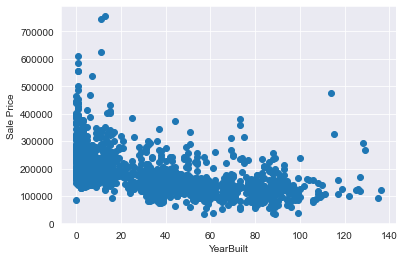

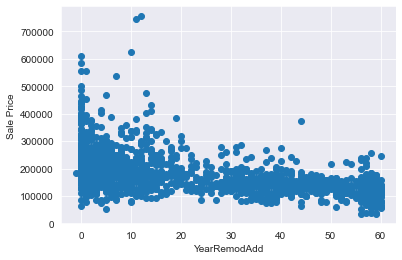

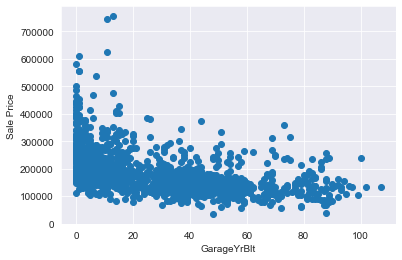

In [115]:
for var in year_vars:
    if var!= 'YrSold':
        analyze_year_vars_2(df, var)

We see that there is a tendency to a decrease in price, with older houses. In other words, the longer the time between the house was built or remodeled and sale date, the lower the sale Price. 

Which makes sense, cause this means that the house will have an older look, and potentially needs repairs.

## Discrete variables

Let's go ahead and find which variables are discrete, i.e., show a finite number of values

In [117]:
# lets create a list of variables that are discrete

discreate_vars = [var for var in df[num_vars].columns if df[var].nunique() < 20 and var not in year_vars]

# len of discreate variables
print(len(discreate_vars))

13


In [118]:
df[discreate_vars].head()

,OverallQual,OverallCond,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,PoolArea,MoSold
0,7,5,1,0,2,1,3,1,8,0,2,0,2
1,6,8,0,1,2,0,3,1,6,1,2,0,5
2,7,5,1,0,2,1,3,1,6,1,2,0,9
3,7,5,1,0,1,0,3,1,7,1,3,0,2
4,8,5,1,0,2,1,4,1,9,1,3,0,12


These discrete variables tend to be qualifications (Qual) or grading scales (Cond), or refer to the number of rooms, or units (FullBath, GarageCars), or indicate the area of the room (KitchenAbvGr).

We expect higher prices, with bigger numbers.

Let's go ahead and analyse their contribution to the house price.

MoSold is the month in which the house was sold.

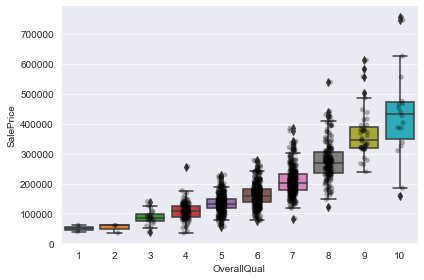

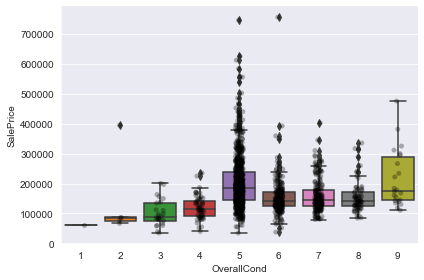

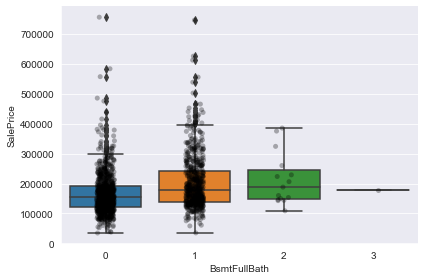

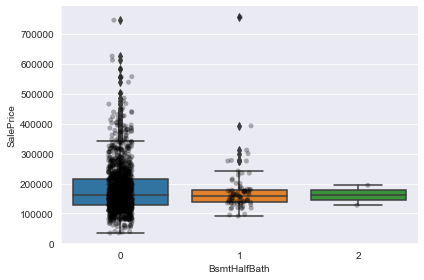

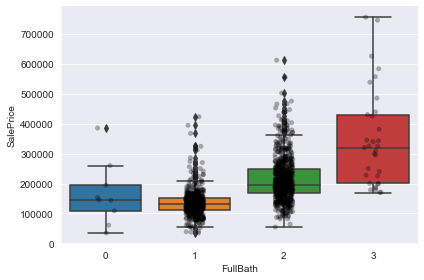

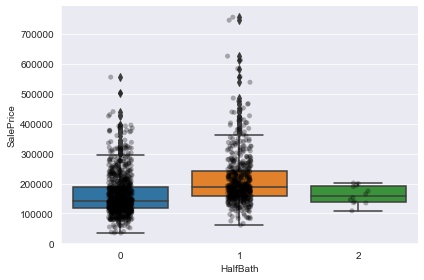

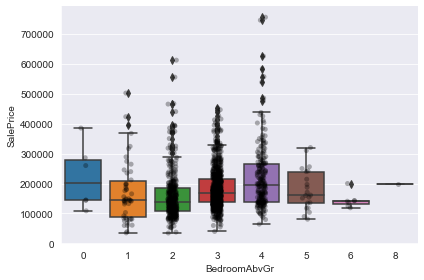

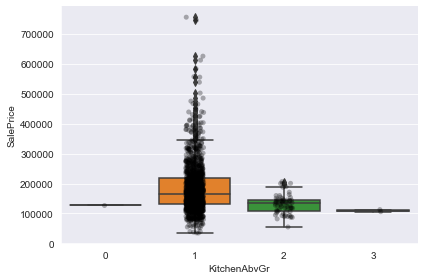

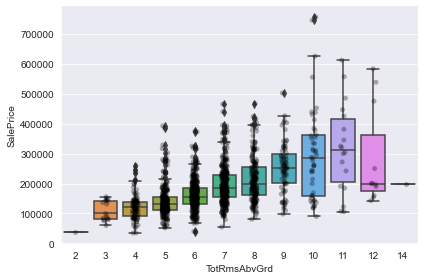

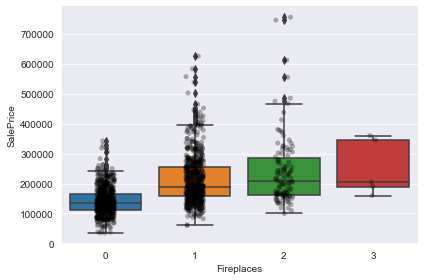

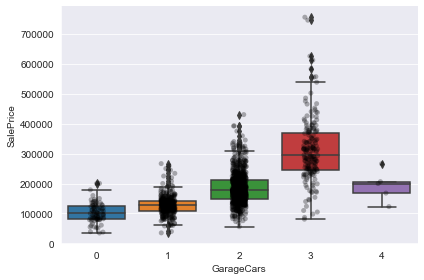

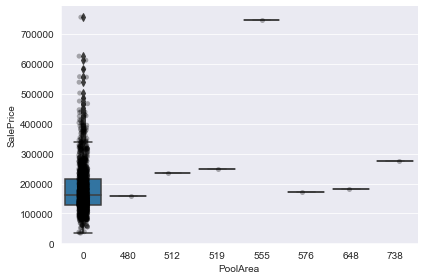

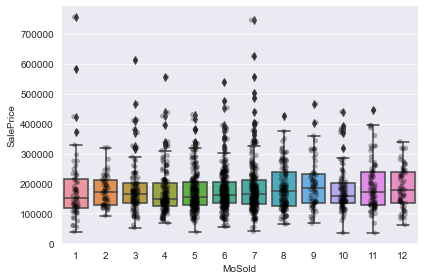

In [126]:
for var in discreate_vars:
    
    #plt.figure(figsize = (8,6))
    sns.catplot(data = df, x = var, y = 'SalePrice', kind = 'box', height = 4, aspect = 1.5)
    
    sns.stripplot(data = df, x = var, y = 'SalePrice', color = 'black', alpha = 0.3, jitter = 0.1)
    plt.show();


For most discrete numerical variables, we see an increase in the sale price, with the quality, or overall condition, or  number of rooms, or surface.

For some variables, we don't see this tendency. Most likely that variable is not a good predictor of sale price.

## Continuous variables

Let's go ahead and find the distribution of the continuous variables. We will consider continuous variables to all those that are not temporal or discrete.

In [130]:
# create a list of continuous variables
cont_vars = [var for var in df[num_vars] if var not in discreate_vars + year_vars]

# len of continuous variables
print(len(cont_vars))

18


In [131]:
print(cont_vars)

['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal']


In [132]:
# check the cont_vars data
df[cont_vars].head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal
0,65.0,8450,196.0,706,0,150,856,856,854,0,1710,548,0,61,0,0,0,0
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,1262,460,298,0,0,0,0,0
2,68.0,11250,162.0,486,0,434,920,920,866,0,1786,608,0,42,0,0,0,0
3,60.0,9550,0.0,216,0,540,756,961,756,0,1717,642,0,35,272,0,0,0
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,2198,836,192,84,0,0,0,0


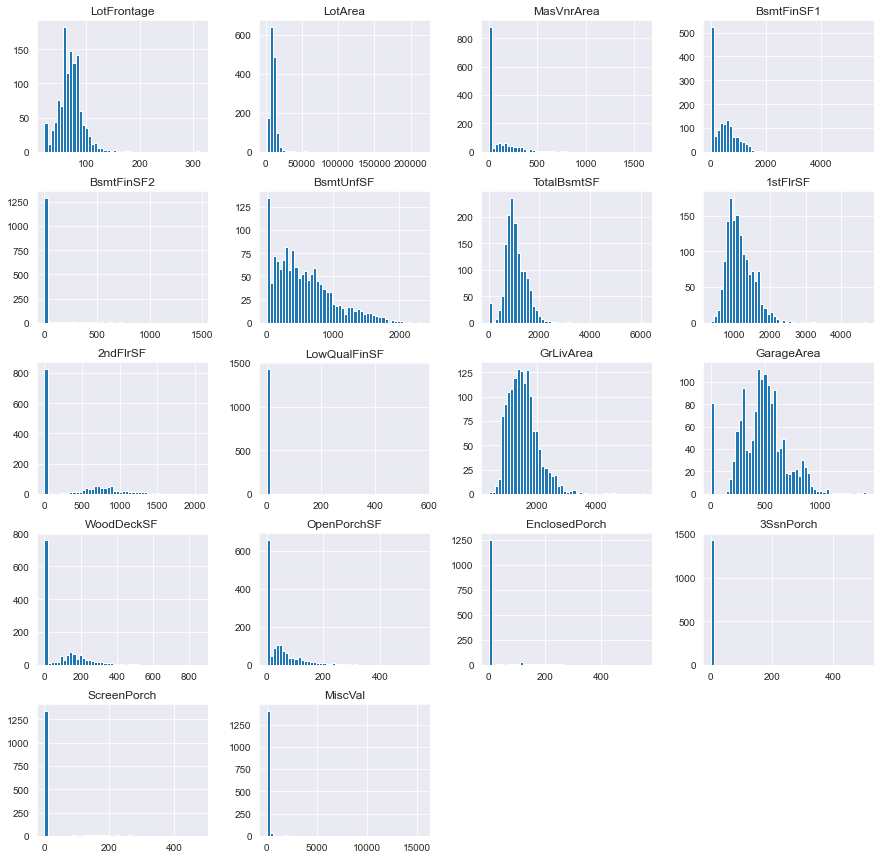

In [135]:
# plotting the histogram of all the continuous variables

df[cont_vars].hist(bins = 50, figsize = (15,15))
plt.show();

The variables are not normally distributed. And there are a particular few that are extremely skewed like 3SsnPorch, ScreenPorch and MiscVal.

Sometimes, transforming the variables to improve the value spread, improves the model performance. But it is unlikely that a transformation will help change the distribution of the super skewed variables dramatically. So, lets try applying some transformations to these variables and check.

We can apply a Yeo-Johnson transformation to variables like LotFrontage, LotArea, BsmUnfSF, and a binary transformation to variables like 3SsnPorch, ScreenPorch and MiscVal.

Let's go ahead and do that.

In [136]:
# first making a list with the super skewed variables

skewed = [
    'BsmtFinSF2', 'LowQualFinSF', 'EnclosedPorch',
    '3SsnPorch', 'ScreenPorch', 'MiscVal'
]

In [141]:
# capture the remaining continuous variables
cont_vars = [
    'LotFrontage',
    'LotArea',
    'MasVnrArea',
    'BsmtFinSF1',
    'BsmtUnfSF',
    'TotalBsmtSF',
    '1stFlrSF',
    '2ndFlrSF',
    'GrLivArea',
    'GarageArea',
    'WoodDeckSF',
    'OpenPorchSF',
]

In [145]:
# lets analyze the distribution after applying the yeo-johnson transformation

# creating a temp copy of the data
temp = df.copy()

# transform the variable using yeoJohnson transformation
for var in cont_vars:
    temp[var], param = stats.yeojohnson(df[var])  

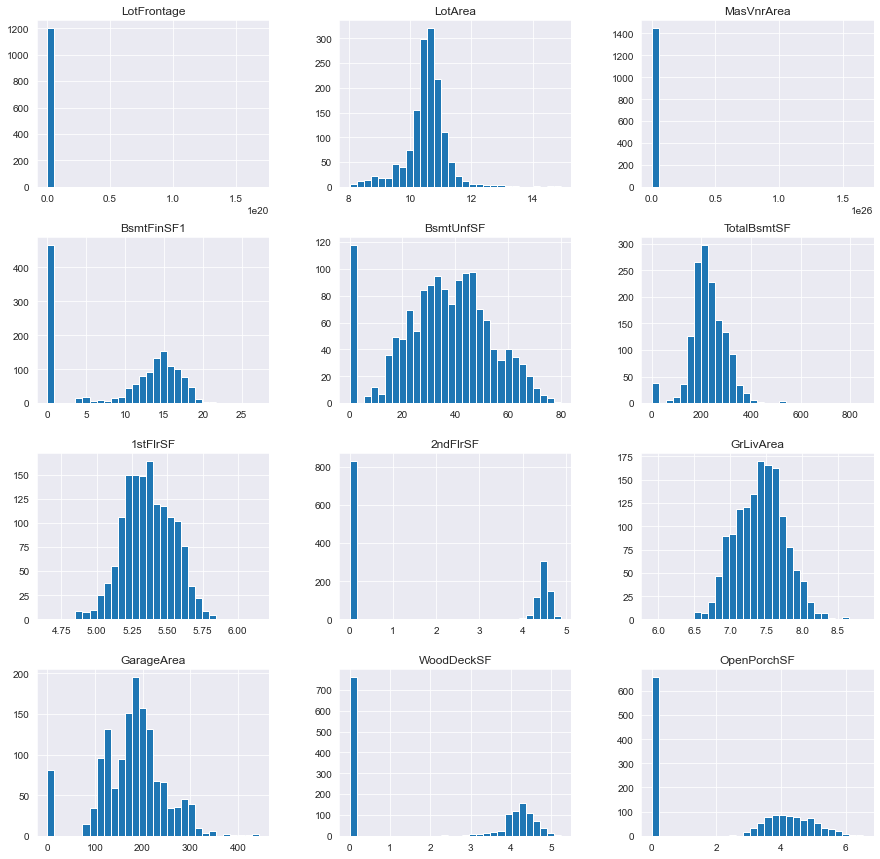

In [147]:
# histogram of the transformed variables
temp[cont_vars].hist(bins = 30, figsize = (15, 15))
plt.show()

For LotFrontage and MasVnrArea the transformation did not do an amazing job. 

For the others, the values seem to be spread more evenly in the range.

Whether this helps improve the predictive power, remains to be seen. To determine if this is the case, we should train a model with the original values and one with the transformed values, and determine model performance, and feature importance.

Here, we will do a quick visual exploration:

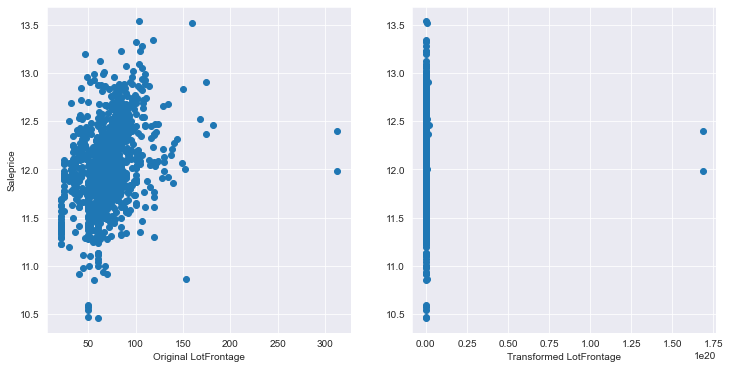

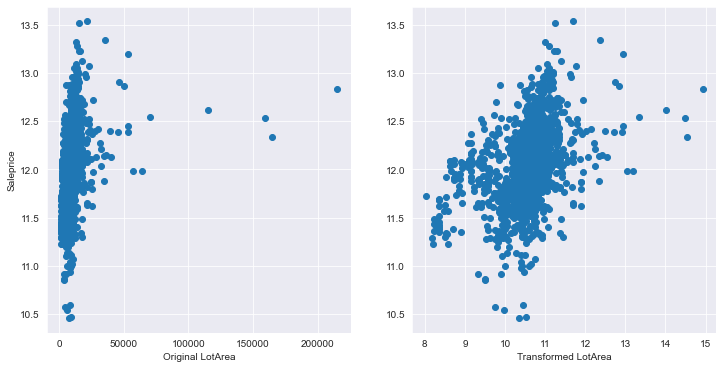

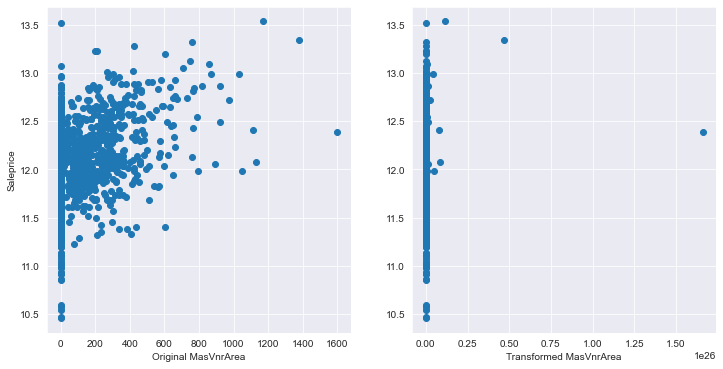

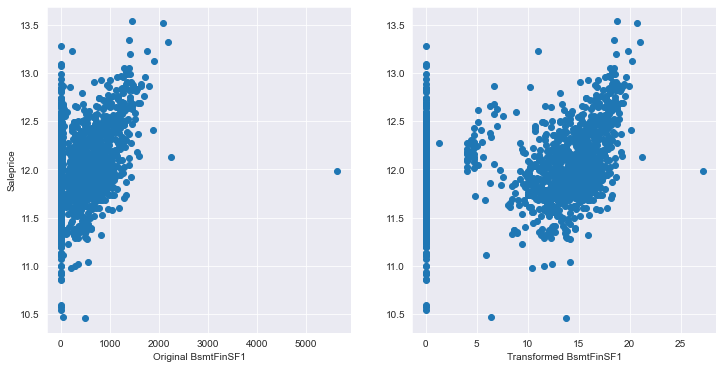

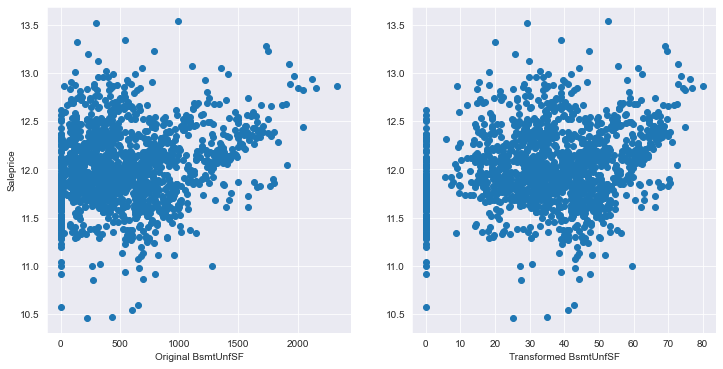

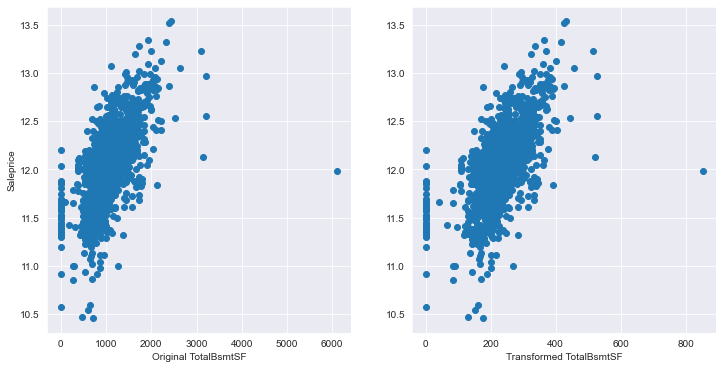

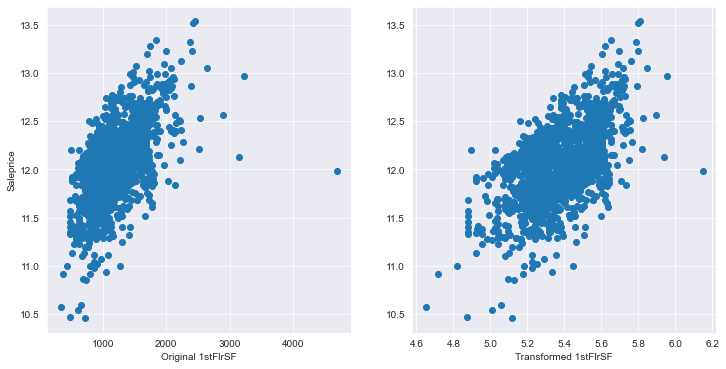

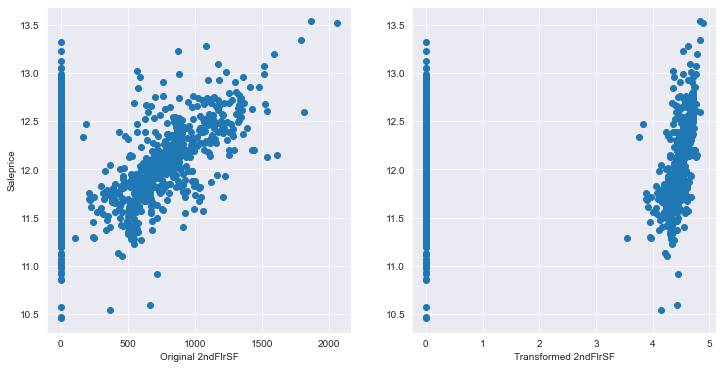

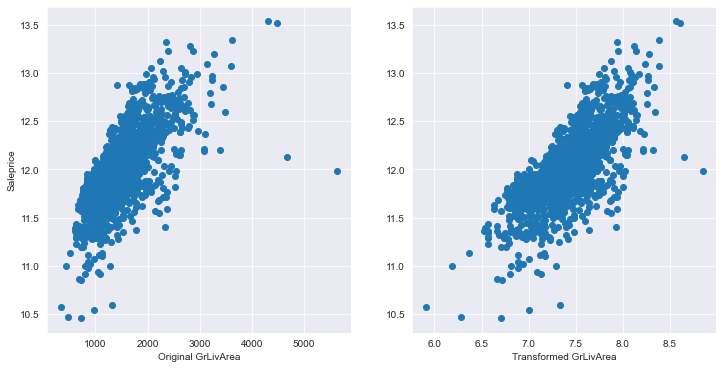

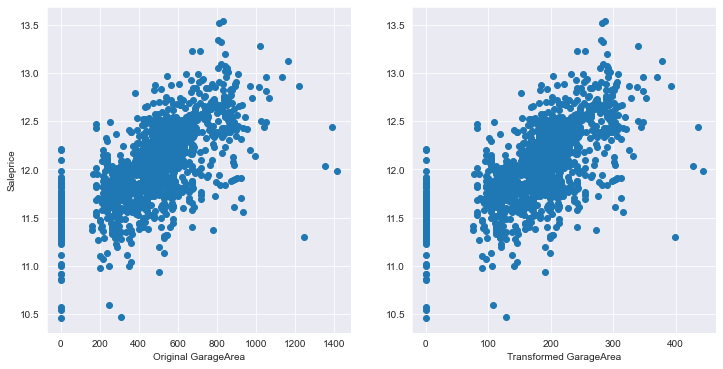

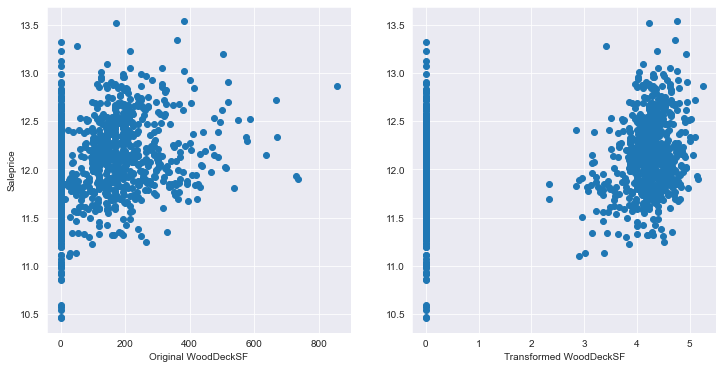

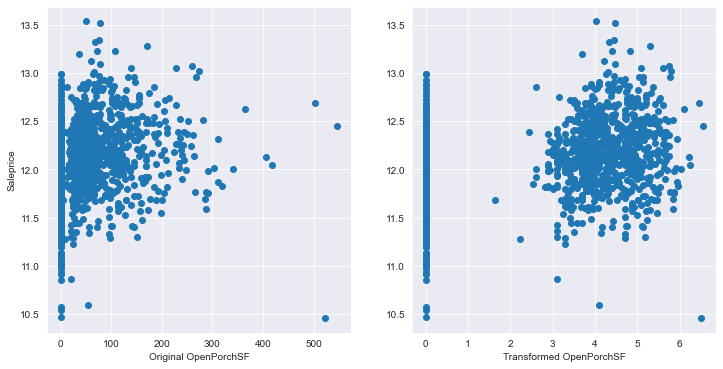

In [153]:
# plotting the original and transformed data vs the target variable

for var in cont_vars:
    
    plt.figure(figsize = (12,6))
    
    # create sub plots
    # plot the original
    plt.subplot(1, 2, 1)
    plt.scatter(df[var], np.log(df['SalePrice']))
    plt.xlabel('Original ' + var)
    plt.ylabel('Saleprice')
    
    # plot the transformed data
    plt.subplot(1, 2, 2)
    plt.scatter(temp[var], np.log(df['SalePrice']))
    plt.xlabel('Transformed ' + var)
    plt.show()

As per these visuals, the transformations seems to improve the relationship only for LotArea.

Let's try a different transformation now. Most variables contain the value 0, and thus we can't apply the logarithmic transformation, but we can certainly do that for the following variables:

 ["LotFrontage", "1stFlrSF", "GrLivArea"]
 
 So let's do that and see if that changes the variable distribution and its relationship with the target.
 
 ### Logarithmic transformation

In [155]:
test_vars = ["LotFrontage", "1stFlrSF", "GrLivArea"]
   
# making a copy
temp_df = df.copy()

for var in test_vars:
    # applying logarithmic transformations
    temp_df[var] = np.log(temp_df[var])   
    

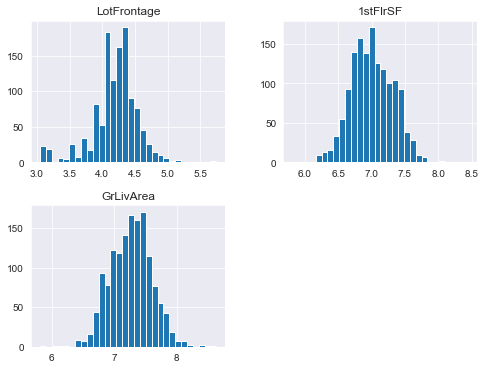

In [162]:
# check the distributions of these log transformed data

temp_df[test_vars].hist(bins = 30, figsize= (8,6))
plt.plot();

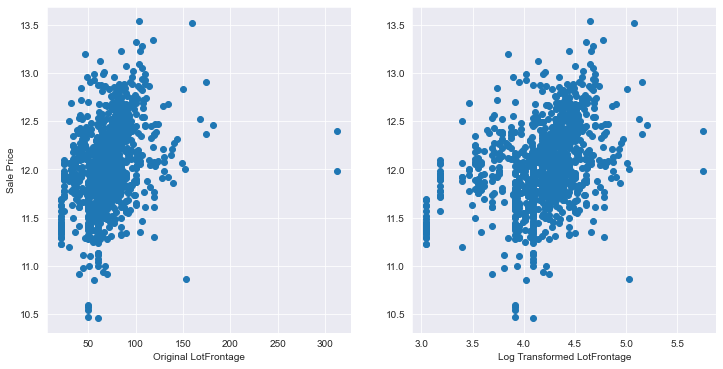

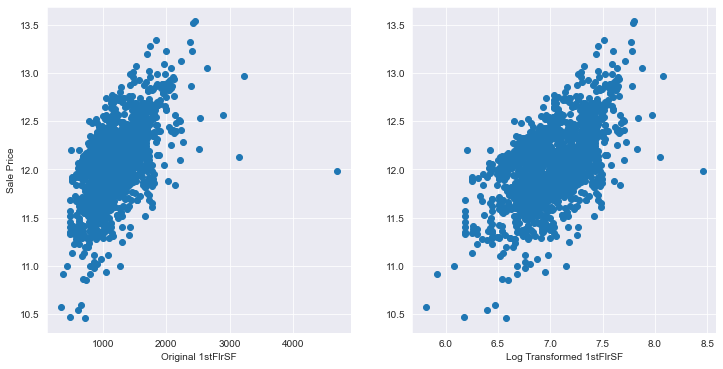

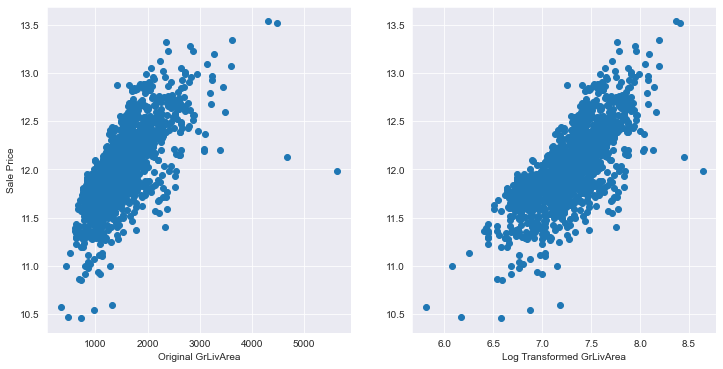

In [157]:
# comparing the relationship between the Original and Log Transformed variables against the Sale Price 
for var in test_vars:
    
    plt.figure(figsize = (12, 6))
    
    plt.subplot(1,2,1)
    plt.scatter(df[var], np.log(df['SalePrice']))
    plt.ylabel('Sale Price')
    plt.xlabel('Original '+ var )
    
    plt.subplot(1,2,2)
    plt.scatter(temp_df[var], np.log(df['SalePrice']))
    plt.xlabel('Log Transformed '+ var )   
    
    plt.show()

The transformed variables have a better spread of the values, which may in turn, help make better predictions.

## Skewed variables

Let's transform them into binary variables and see how predictive they are:

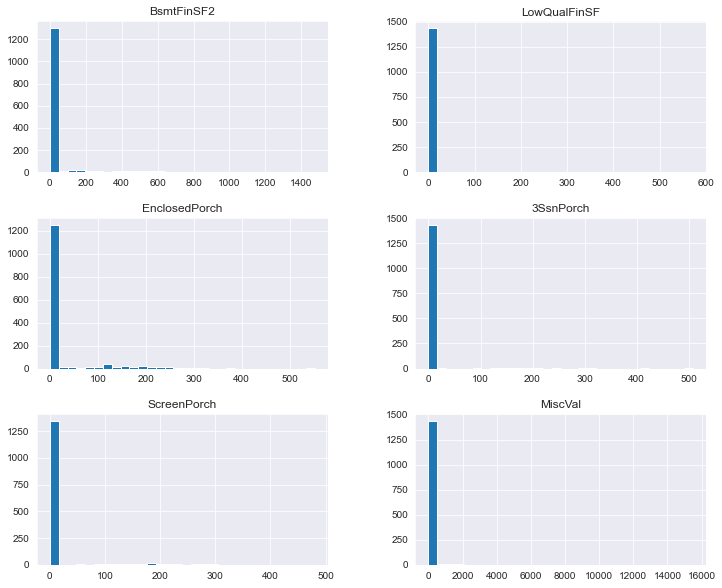

In [166]:
# checking the distribution again for the skewed variables
df[skewed].hist(bins = 30, figsize = (12,10))
plt.show();

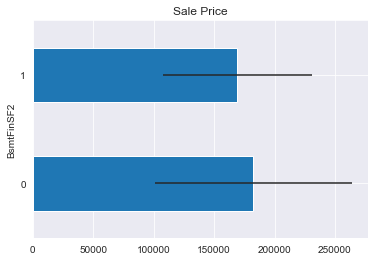

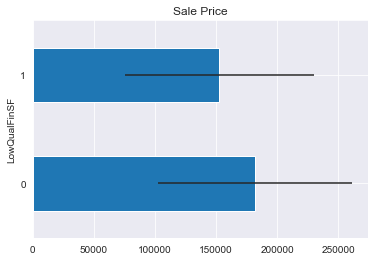

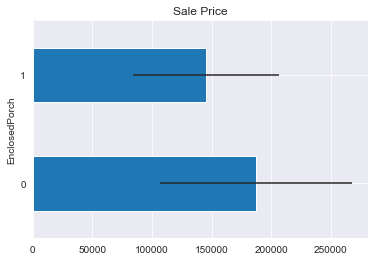

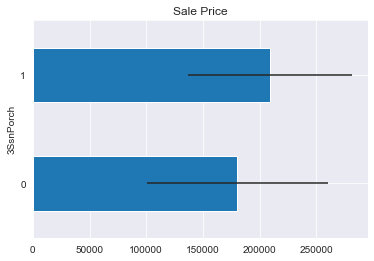

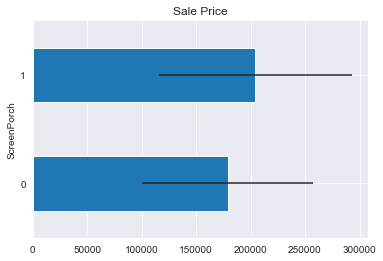

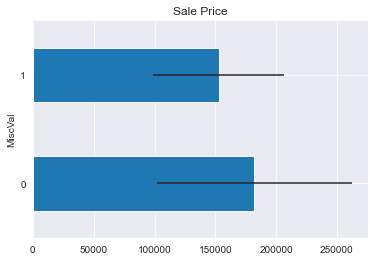

In [173]:
# lets try to map it 1 for non 0 values for these variables

temp_bin = df.copy()

for var in skewed:
    
    # mapping the value to 0 if 0, else 1
    temp_bin[var] = np.where(temp_bin[var] == 0, 0, 1)
    
    temp = temp_bin.groupby(var)['SalePrice'].agg(['mean','std'])

    # generate bar plot to get the impact on Sale Price per 0 and non-0 values
    temp.plot(kind = 'barh', y = 'mean', xerr='std', legend = False, title= 'Sale Price')
    plt.show();

There seem to be a difference in Sale Price in the mapped values, but the confidence intervals overlap, so most likely this is not significant or predictive.

# Categorical variables

Let's go ahead and analyse the categorical variables present in the dataset.

In [174]:
# len of the categorical variables
print(len(cat_vars))

44


In [175]:
# check the cat vars data
df[cat_vars].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,MSSubClass
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,60
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,20
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,60
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml,70
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,60


## Number of labels: cardinality


Let's evaluate how many different categories are present in each of the variables.

In [182]:
# finding the cardinality of cat_vars
df[cat_vars].nunique().sort_values(ascending = False)

Neighborhood     25
Exterior2nd      16
MSSubClass       15
Exterior1st      15
Condition1        9
SaleType          9
RoofMatl          8
HouseStyle        8
Condition2        8
Functional        7
BsmtFinType1      6
GarageType        6
RoofStyle         6
SaleCondition     6
Heating           6
Foundation        6
BsmtFinType2      6
FireplaceQu       5
GarageQual        5
GarageCond        5
Electrical        5
HeatingQC         5
MSZoning          5
LotConfig         5
BldgType          5
ExterCond         5
LotShape          4
MiscFeature       4
Fence             4
LandContour       4
BsmtExposure      4
KitchenQual       4
MasVnrType        4
ExterQual         4
BsmtQual          4
BsmtCond          4
LandSlope         3
GarageFinish      3
PavedDrive        3
PoolQC            3
Street            2
Utilities         2
CentralAir        2
Alley             2
dtype: int64

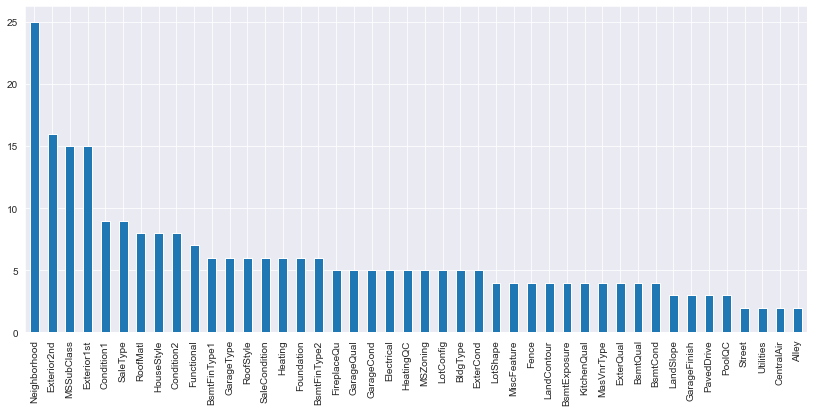

In [184]:
# visualize the cardinality using bar plot
df[cat_vars].nunique().sort_values(ascending = False).plot(kind = 'bar', figsize = (14, 6))
plt.show()

All the categorical variables show low cardinality, this means that they have only few different labels. 

## Quality variables

There are a number of variables that refer to the quality of some aspect of the house, for example the garage, or the fence, or the kitchen. I will replace these categories by numbers increasing with the quality of the place or room.

The mappings can be obtained from the Data Description. One example:

- Ex = Excellent
- Gd = Good
- TA = Average/Typical
- Fa =	Fair
- Po = Poor

In [185]:
# re-map strings to numbers, which determine quality

qual_mappings = {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5, 'Missing': 0, 'NA': 0}

qual_vars = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
             'HeatingQC', 'KitchenQual', 'FireplaceQu',
             'GarageQual', 'GarageCond',
            ]

for var in qual_vars:
    df[var] = df[var].map(qual_mappings)

In [186]:
exposure_mappings = {'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4, 'Missing': 0, 'NA': 0}

var = 'BsmtExposure'

df[var] = df[var].map(exposure_mappings)

In [187]:
finish_mappings = {'Missing': 0, 'NA': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6}

finish_vars = ['BsmtFinType1', 'BsmtFinType2']

for var in finish_vars:
    df[var] = df[var].map(finish_mappings)

In [188]:
garage_mappings = {'Missing': 0, 'NA': 0, 'Unf': 1, 'RFn': 2, 'Fin': 3}

var = 'GarageFinish'

df[var] = df[var].map(garage_mappings)

In [189]:
fence_mappings = {'Missing': 0, 'NA': 0, 'MnWw': 1, 'GdWo': 2, 'MnPrv': 3, 'GdPrv': 4}

var = 'Fence'

df[var] = df[var].map(fence_mappings)

In [190]:
# capture all quality variables

qual_vars  = qual_vars + finish_vars + ['BsmtExposure','GarageFinish','Fence']

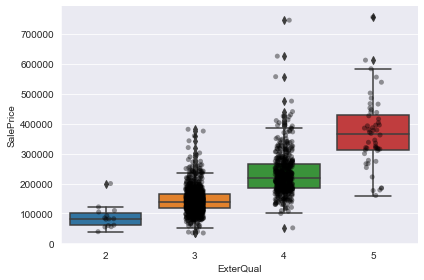

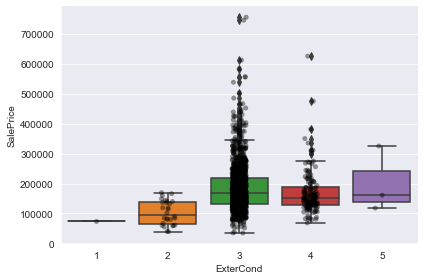

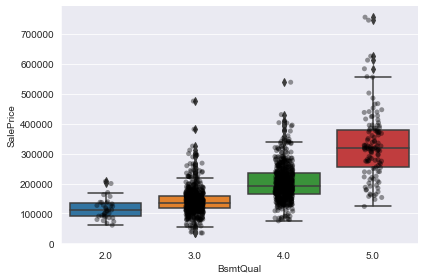

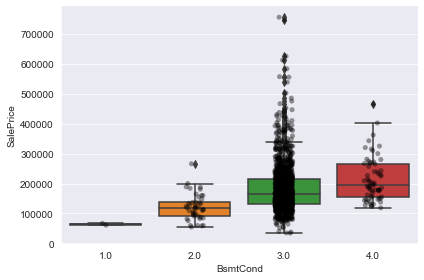

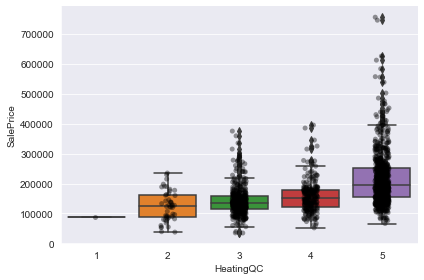

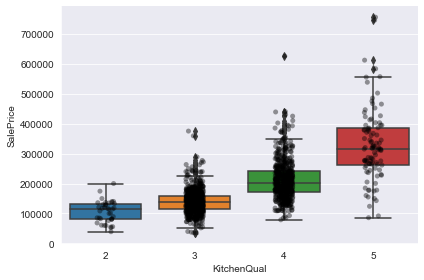

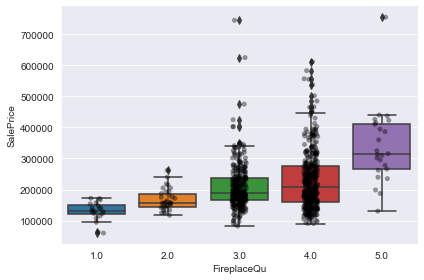

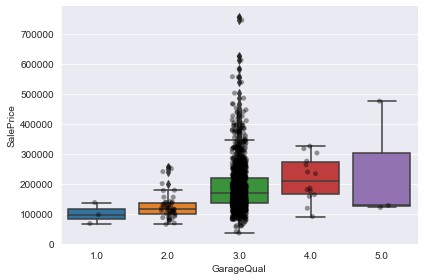

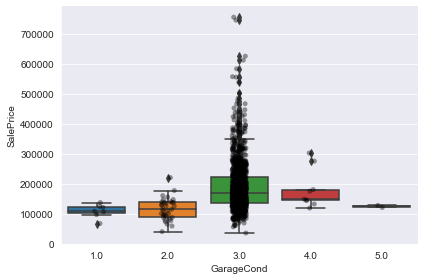

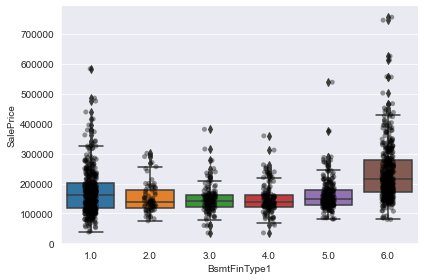

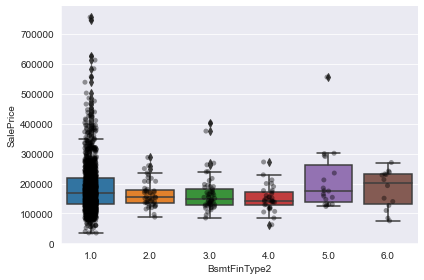

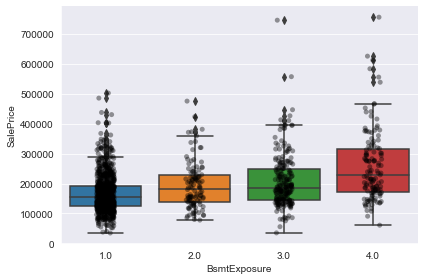

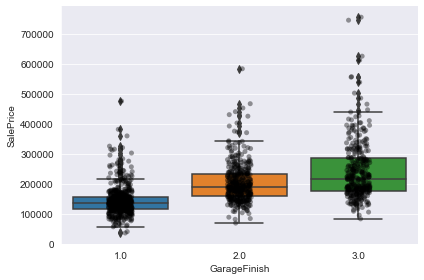

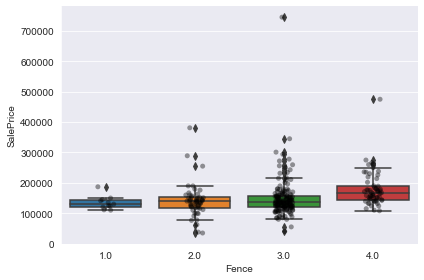

In [205]:
# now let's plot the house mean sale price based on the quality of the 
# various attributes

for var in qual_vars:
    
    sns.catplot(data = df, x = var, y = 'SalePrice', kind = 'box', height = 4, aspect = 1.5)
    
    sns.stripplot(data = df, x = var, y = 'SalePrice', jitter = 0.1, alpha = 0.4, color='black')
    plt.show();

For most attributes, the increase in the house price with the value of the variable, is quite clear.

In [207]:
# capture all other categorical that wasnt mapped as part of qual_vars

cat_others = [var for var in cat_vars if var not in qual_vars]

len(cat_others)

30

## Rare labels:

Let's go ahead and investigate now if there are labels that are present only in a small number of houses:

In [214]:
def analyze_rare_vars(data, var, rare_per):
    
    # create a copy of the data passed
    data = data.copy()
    
    # calculate the percentage of the presence of the variable
    tmp = data.groupby(var)['SalePrice'].count()/len(data)
    
    # return categorical variables that are very rare
    return tmp[tmp < rare_per]

In [213]:
df.groupby('MSZoning')['SalePrice'].count()/len(df)

MSZoning
C (all)    0.006849
FV         0.044521
RH         0.010959
RL         0.788356
RM         0.149315
Name: SalePrice, dtype: float64

In [215]:
# find all the categories that has less than 0.1 % presence

for var in cat_vars:
    print(analyze_rare_vars(df, var, 0.01))
    print()

MSZoning
C (all)    0.006849
Name: SalePrice, dtype: float64

Street
Grvl    0.00411
Name: SalePrice, dtype: float64

Series([], Name: SalePrice, dtype: float64)

LotShape
IR3    0.006849
Name: SalePrice, dtype: float64

Series([], Name: SalePrice, dtype: float64)

Utilities
NoSeWa    0.000685
Name: SalePrice, dtype: float64

LotConfig
FR3    0.00274
Name: SalePrice, dtype: float64

LandSlope
Sev    0.008904
Name: SalePrice, dtype: float64

Neighborhood
Blueste    0.001370
NPkVill    0.006164
Veenker    0.007534
Name: SalePrice, dtype: float64

Condition1
PosA    0.005479
RRAe    0.007534
RRNe    0.001370
RRNn    0.003425
Name: SalePrice, dtype: float64

Condition2
Artery    0.001370
Feedr     0.004110
PosA      0.000685
PosN      0.001370
RRAe      0.000685
RRAn      0.000685
RRNn      0.001370
Name: SalePrice, dtype: float64

Series([], Name: SalePrice, dtype: float64)

HouseStyle
1.5Unf    0.009589
2.5Fin    0.005479
2.5Unf    0.007534
Name: SalePrice, dtype: float64

RoofStyle
Flat

Some of the categorical variables show multiple labels that are present in less than 1% of the houses. 

Labels that are under-represented in the dataset tend to cause over-fitting of machine learning models. 

That is why we want to remove them.

Finally, we want to explore the relationship between the categories of the different variables and the house sale price:

<Figure size 576x432 with 0 Axes>

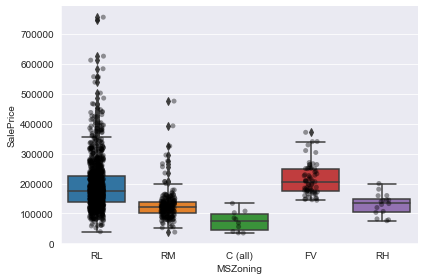

<Figure size 576x432 with 0 Axes>

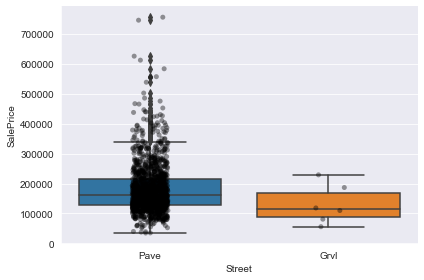

<Figure size 576x432 with 0 Axes>

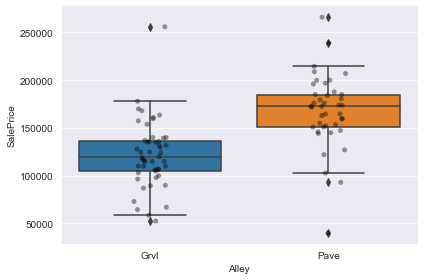

<Figure size 576x432 with 0 Axes>

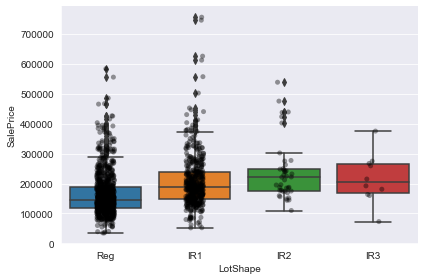

<Figure size 576x432 with 0 Axes>

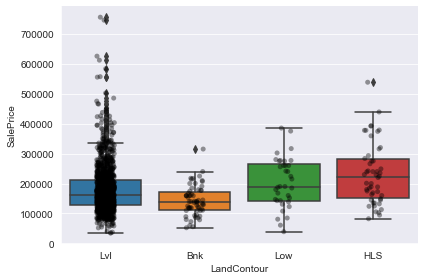

<Figure size 576x432 with 0 Axes>

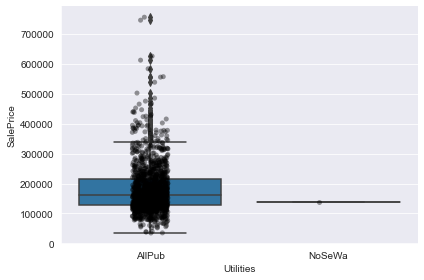

<Figure size 576x432 with 0 Axes>

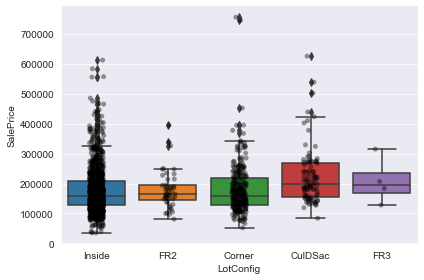

<Figure size 576x432 with 0 Axes>

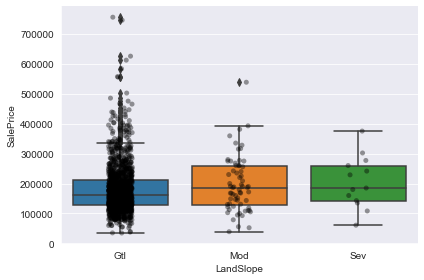

<Figure size 576x432 with 0 Axes>

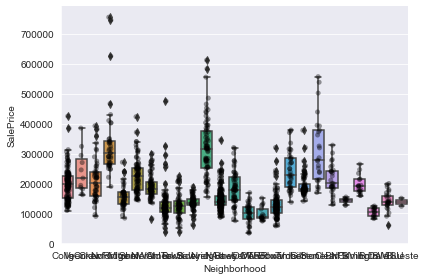

<Figure size 576x432 with 0 Axes>

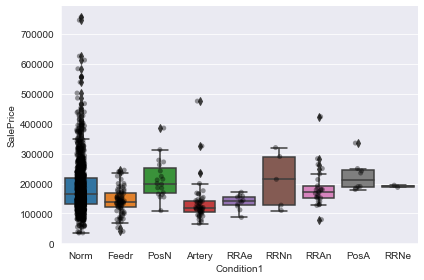

<Figure size 576x432 with 0 Axes>

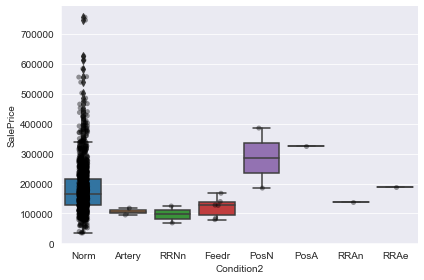

<Figure size 576x432 with 0 Axes>

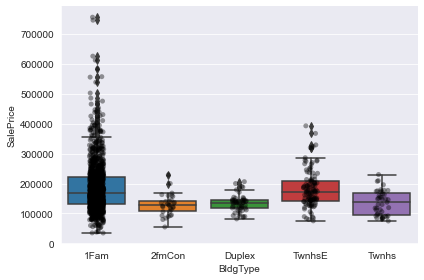

<Figure size 576x432 with 0 Axes>

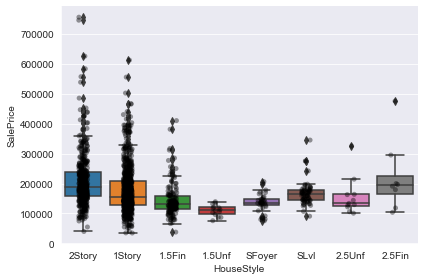

<Figure size 576x432 with 0 Axes>

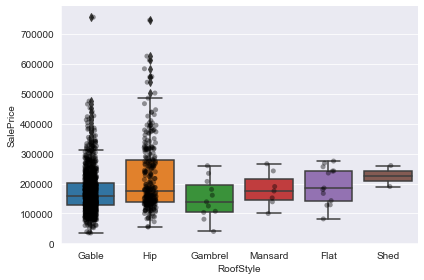

<Figure size 576x432 with 0 Axes>

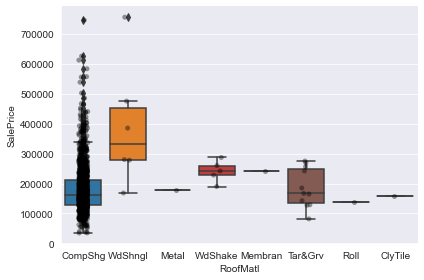

<Figure size 576x432 with 0 Axes>

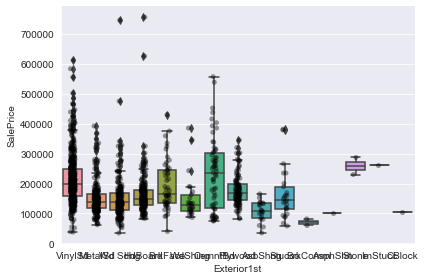

<Figure size 576x432 with 0 Axes>

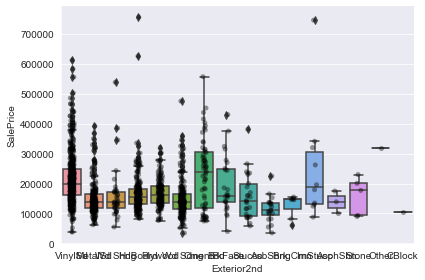

<Figure size 576x432 with 0 Axes>

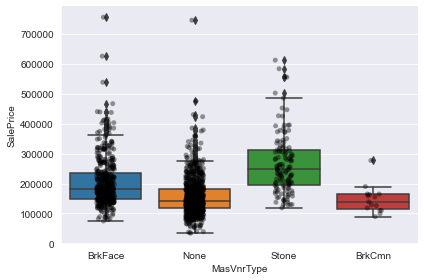

<Figure size 576x432 with 0 Axes>

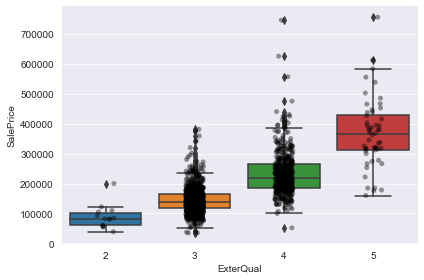

<Figure size 576x432 with 0 Axes>

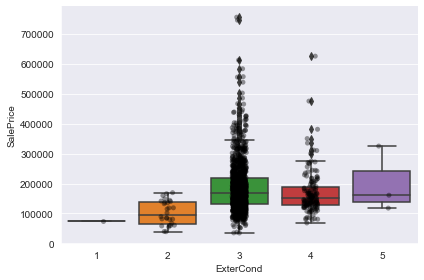

<Figure size 576x432 with 0 Axes>

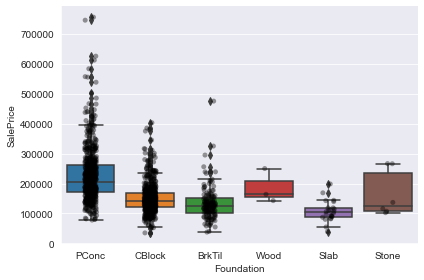

<Figure size 576x432 with 0 Axes>

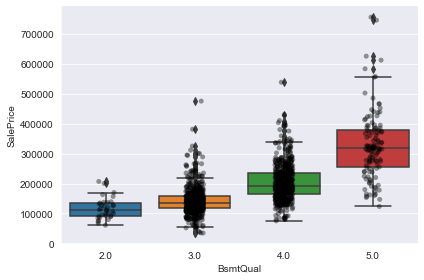

<Figure size 576x432 with 0 Axes>

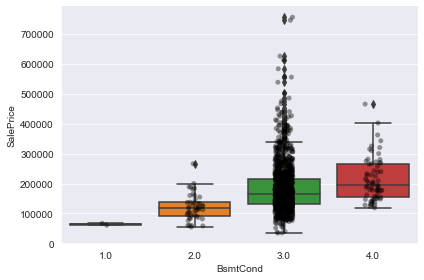

<Figure size 576x432 with 0 Axes>

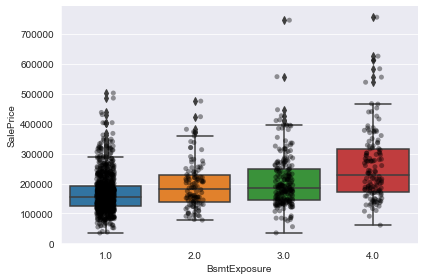

<Figure size 576x432 with 0 Axes>

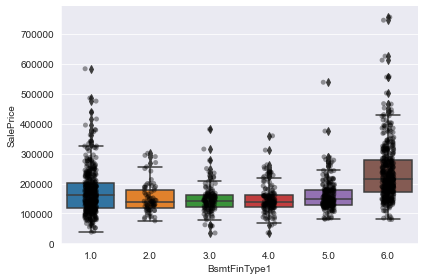

<Figure size 576x432 with 0 Axes>

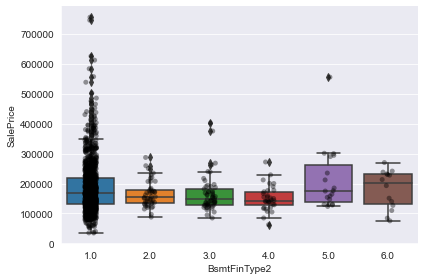

<Figure size 576x432 with 0 Axes>

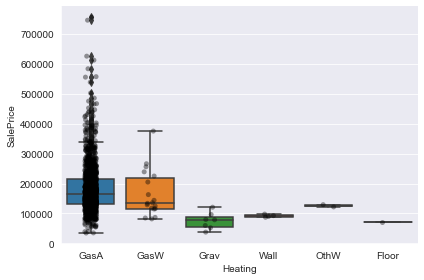

<Figure size 576x432 with 0 Axes>

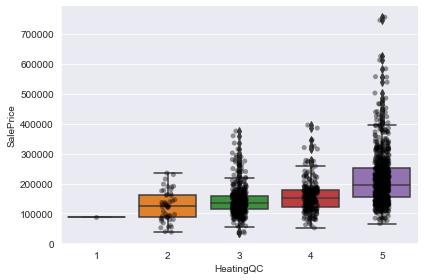

<Figure size 576x432 with 0 Axes>

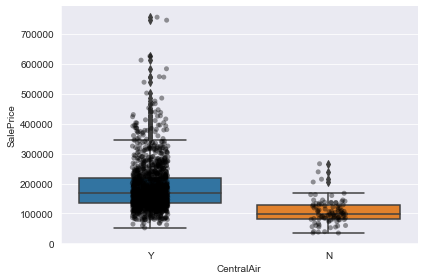

<Figure size 576x432 with 0 Axes>

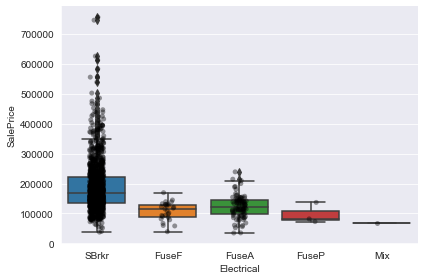

<Figure size 576x432 with 0 Axes>

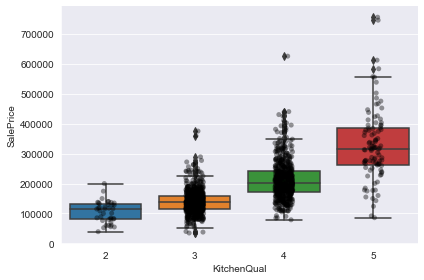

<Figure size 576x432 with 0 Axes>

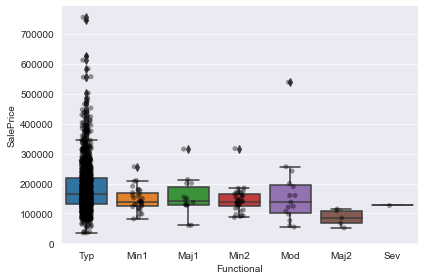

<Figure size 576x432 with 0 Axes>

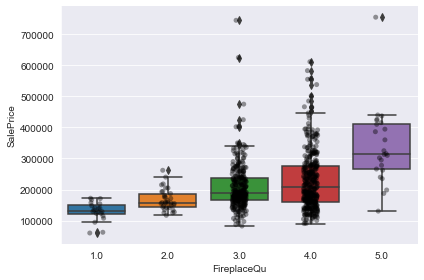

<Figure size 576x432 with 0 Axes>

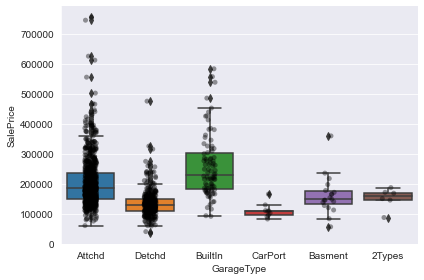

<Figure size 576x432 with 0 Axes>

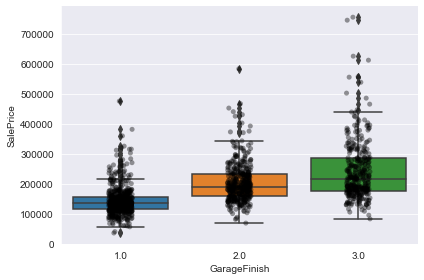

<Figure size 576x432 with 0 Axes>

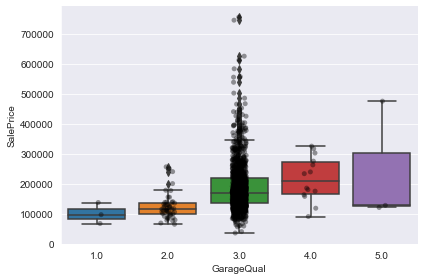

<Figure size 576x432 with 0 Axes>

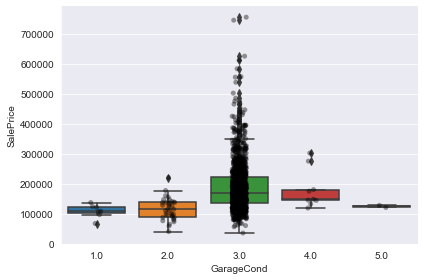

<Figure size 576x432 with 0 Axes>

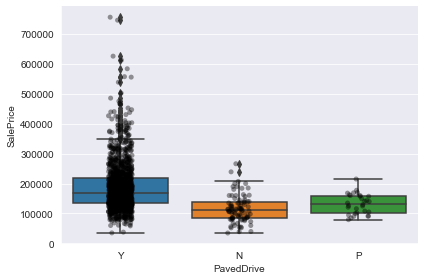

<Figure size 576x432 with 0 Axes>

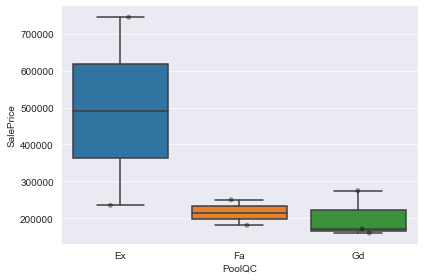

<Figure size 576x432 with 0 Axes>

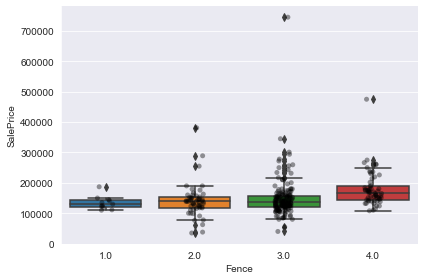

<Figure size 576x432 with 0 Axes>

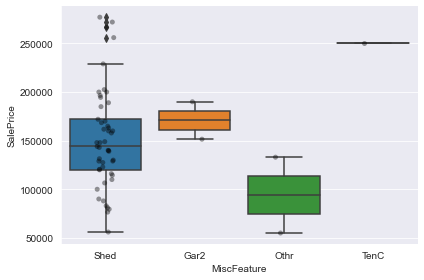

<Figure size 576x432 with 0 Axes>

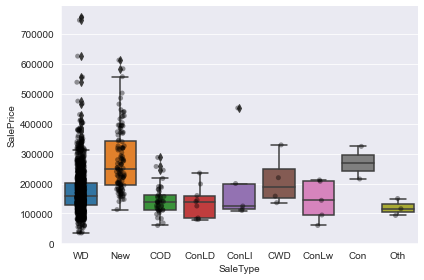

<Figure size 576x432 with 0 Axes>

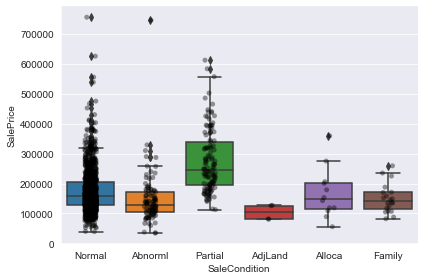

<Figure size 576x432 with 0 Axes>

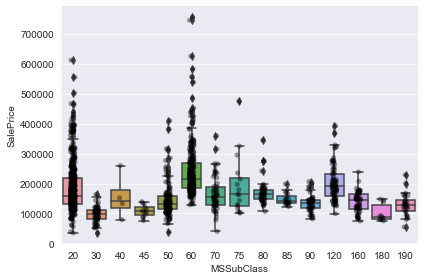

In [217]:
for var in cat_vars:
    
    plt.figure(figsize = (8,6))
    sns.catplot(data = df, x = var, y = 'SalePrice', kind = 'box', height = 4, aspect = 1.5)
    
    sns.stripplot(data = df, x = var, y = 'SalePrice', jitter = 0.1, alpha = 0.4, color = 'black')
    
    plt.show()

**Disclaimer:**

There is certainly more that can be done to understand the nature of this data and the relationship of these variables with the target, SalePrice. And also about the distribution of the variables themselves.


In [218]:
# saving the clean data
df.to_csv("Clean_House_Pred_Data.csv", index = False)